## Graphical Exploratory Data Analysis on the Iris Dataset

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

# another way to load the iris dataset
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = np.array([iris.target]).T

df = pd.DataFrame(np.concatenate((X, y), axis=1),
                  columns=iris.feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


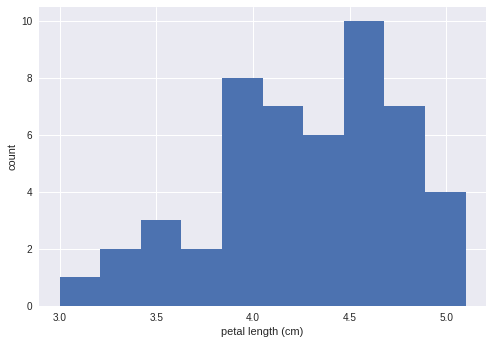

In [0]:
# Set default Seaborn style
sns.set()

# Numpy Array: subset of the data set containing the iris versicolor petal length
versicolor_petal_length = df[['petal length (cm)']].values
petal_lengths = versicolor_petal_length[50:100]
# this is a sample containing 50 successive values

# Plot histogram of versicolor petal lengths
_ = plt.hist(petal_lengths)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

The histogram we just made had ten bins. This is the default of matplotlib. The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. Let's plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins.

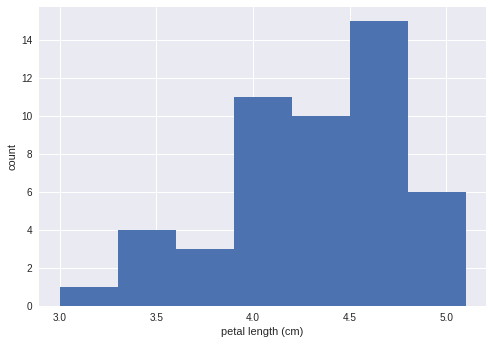

In [0]:
_ = plt.hist(petal_lengths, bins = int(np.sqrt(len(petal_lengths))))
# 7 bins for 50 samples

_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')
plt.show()

Now the number of bins can be very tricky and can affect interpreting insights from the histogram. We will try another seaborn visualization technique: bee sworm. But first, we need to interpret the target class results (0, 1, 2) into actual flower species to be able to visualize our sworms.

In [0]:
# Add Species column to df based on the target class
df['species'] = np.where(df['target']==0.0, 'setosa',
                         np.where(df['target']==2.0, 'virginica', 'versicolor species'))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


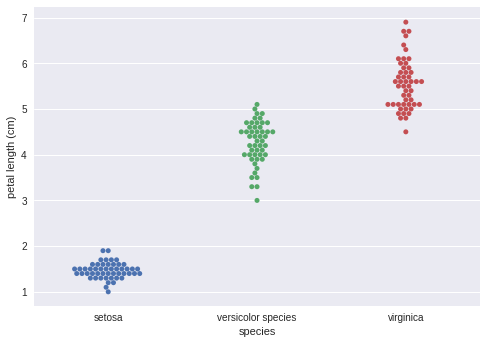

In [0]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='species', y='petal length (cm)', data=df)
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')
plt.show()

From the above bee swarm, we can infer that virginica petals tend to be the longest of the three species, and setosa petals tend to be the shortest. Some individual virginica flowers may be shorter than individual versicolor flowers. It is also possible that an individual setosa flower may have longer petals than an individual versicolor flower, although this is highly unlikely.

However, when dealing with a huge number of data points, bee sworms has a problem: the edges may have overlapping data points to fit all points on the plot and it is hard to make sense out of the visualization that way. As an alternative, we can use ECDF plots or box plots. As for ECDF: we plot the number of data points on x-axis and the fraction of data points that have a value that is smaller than the corresponding x-value on y-axis.

In [0]:
def ecdf(data):
    """Compute Empirical Cumulative Distribution Function for
    a one-dimensional array of measurements."""
    
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y
  
# The y data of the ECDF go from 1/n to 1 in equally spaced increments
# We can construct this using np.arange()
# The end value in np.arange() is not inclusive: np.arange() will be from 1 to n+1

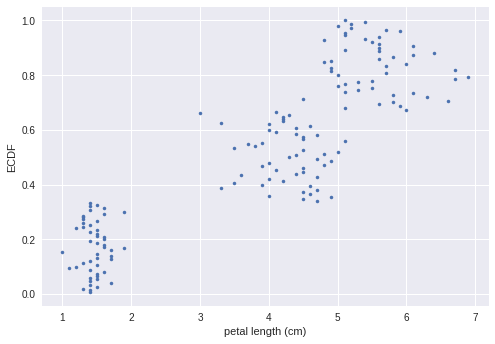

In [0]:
# Compute ECDF for versicolor data: x_vers, y_vers
x, y = ecdf(versicolor_petal_length) # all samples

# Generate plot
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

plt.show()

Let's plot ECDFs for the petal lengths of all three iris species. First, we will need to separate the petal length data points for each of the three species alone, then we can overlay the three ECDFs on the same plot.

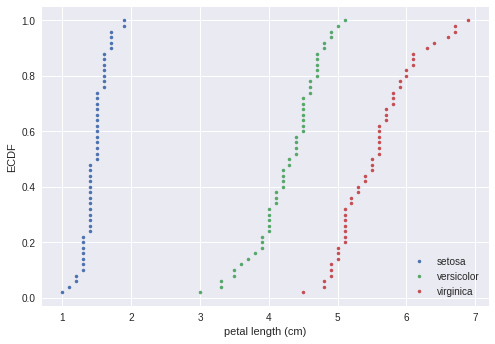

In [0]:
# Extracting data and applying ECDF
setosa_petal_length = df[df['species'] == 'setosa']['petal length (cm)']
versicolor_petal_length = df[df['species'] ==
                             'versicolor species']['petal length (cm)']
virginica_petal_length = df[df['species'] == 'virginica']['petal length (cm)']

x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

plt.show()

The ECDFs expose clear differences among the species. Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.

When the number of data points is too large (bee sworms are too cluttered), box plots are also a great alternative. Box plots are effective considering we want to know more statistical info about the data.

Quick notes: the mean is affected by outliers but the median is not.
The median is the 50th percentile: 50% of the data are less than the median.
The 25th percentile is the value of the data point (datum) that is greater than just 25% of the data.

In [0]:
# Specify array of percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles of the petal lengths of versicolor flower species
vers_percentiles = np.percentile(versicolor_petal_length, percentiles)
vers_percentiles

array([3.3   , 4.    , 4.35  , 4.6   , 4.9775])

This shows that 50% of the dataset has a petal length of 4.35 or below and 97.5% of the dataset has a petal length of 4.9 or below.

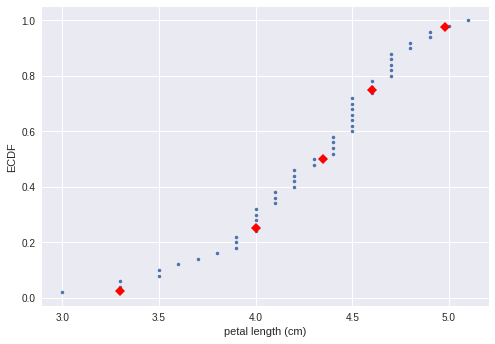

In [0]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds
_ = plt.plot(vers_percentiles, percentiles/100, marker='D', color='red',
         linestyle='none')

# Note: linestyle is the line that connects the points in action,
# in this case: the red diamonds
# it can take the value of none/solid/dotted/dashed

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


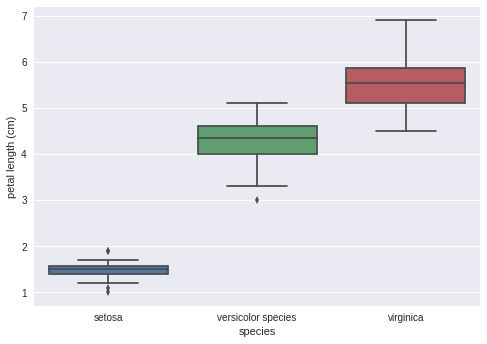

In [0]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=df)
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

plt.show()

Box plots reveal the important features about the data at a glance. The center of the box is the 50th perc (median). The edges are the 25th and the 75th perc. The total height of the box contains the middle 50% of the data (Interquartile Range - IQR). The two segments extended from the box plot represents the distance of 1.5IQR (or the end/border of the data points, if it is less than 1.5IQR). All points outside these segments (whiskers) are often outliers (although not necessarily erroneous) and are represented as individual points. Being > 2IQR away from the median line is a comon criterion for an outlier.

Quick note: in our case, the bee sworm works just fine and there is no real need for box plots. This is because the iris dataset is not too large.

Now bee swarm plots, box plots, and ECDF plots helped us compare the petal lengths of different species of iris (row-wise). But what if we'd want to compare two properties of a single species? Exploring how two features (column-wise) relate to each other can be done by scatter-plotting. Suppose we want to explore the correlation between the petal length and petal width of the versicolor species flowers. First, we need to extract the petal widths of all the versicolor flowers then scatter-plot them against their petal lengths. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated (positive correlation).

Quick note: in our case, scatter-plots are just data points plotted each on their own.

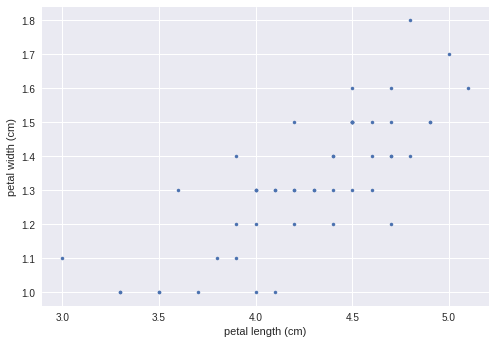

In [0]:
# Extract petal widths of the versicolor flowers
versicolor_petal_width = df[df['species'] == 'versicolor species']['petal width (cm)']

# Create a Scatterplot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width,
             marker='.', linestyle='none')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

plt.show()

The covariance at one sample (data point) is the mean of the product of the differences between the sample and the mean of the data on x-axis and the mean of the data on y-axis.

>$ covariance = \frac{1}{n}\sum_{i=0}^n ((x_{i}-u_{x})(y_{i}-u_{y})) $

As xi and yi of the sample in question has values greater than the axes respective means, then the covariance is positive: this means that x and y are positively correlated.

Also, as xi is greater than ux and yi is lower than uy, this means that the covariance is negative (x and y are anti-correlated).

Another metric of correlation is the Pearson Correlation Coefficient. This is just the covariance divided by the product of the std of the data on x-axis and the std od the data on the y-axis.

>$ \rho = \frac{covariance}{(std_{x})(std_{y})} $

PR is used because we want a universal metric that can calculate variabaility in our data without the resulted number being associated with the nature of our dataset (dimensionless - without any units). PR is the ratio between the variability in the data overall and the variability within each variable independently. It has a range from -1 to 1 where -1 represents 100% negative correlation and +1 represents 100% positive correlation.A value of zero means that there is no correlation at all between the two variables.

In [0]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov (versicolor_petal_length, versicolor_petal_width)

# Extract covariance of length and width of petals
petal_cov = covariance_matrix[0,1]

# np.cov(x, y) returns a 2D array where entries [0,1] and [1,0]
# are the covariances. entry [0,0] is the variance of the data in x,
# and entry [1,1] is the variance of the data in y
covariance_matrix

array([[0.22081633, 0.07310204],
       [0.07310204, 0.03910612]])

In [0]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    
    # Compute correlation matrix:
    corr_mat = np.corrcoef(x, y)

    return corr_mat[0,1]
    # values of [0,1] and [1,0] are always the same
    # values of [0,0] and [1,1] are always = 1

In [0]:
# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)
r

0.7866680885228169

This means that the petal length and the petal width of the versicolor flowers are positively correlated with a PR of 0.787.